# Pima Indians Diabetes Database

In this project we will try to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset  
  
We will use the following data set:  
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## KNN (K-Nearest Neighbors)
K-Nearest Neighbors (KNN) is a machine learning algorithm for classification and regression. It predicts the label or value of a data point by considering its K nearest neighbors. In classification, it assigns the most common class among the neighbors, and in regression, it averages their target values. The algorithm relies on the similarity between data points, often measured using distance metrics like Euclidean distance. Key considerations include choosing an appropriate value for K and performing feature scaling. KNN is simple but may be computationally expensive for large datasets or high dimensions. It finds applications in image recognition, recommendation systems, and medical diagnosis.




## Table of Contents

1. [Load Data Set](#1-load-data-set)
2. [Inspect Data](#2-inspect-data)
3. [Preprocessing and Cleaning](#3-preprocessing-and-cleaning)
4. [EDA (Exploratory Data Analysis)](#4-eda)
5. [Encoding](#5-encoding)
6. [Scaling](#6-scaling)
7. [Tune Hyperparameters - Grid Search](#7-tune-hyperparameters---grid-search)
8. [Build Model](#8-build-model)
9. [Evaluate Model](#9-evaluate-model)



In [18]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 1. [Load Data Set](#1-load-data-set)

In [3]:
relative_path = 'diabetes.csv'
file_path = os.path.join(os.getcwd(), relative_path)

df = pd.read_csv(file_path)

## 2. [Inspect Data](#2-inspect-data)

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
def inspect(df):
    if isinstance(df, pd.DataFrame):
        print(f'Dimensions : {df.shape[0]} rows, {df.shape[1]} columns')
        total_na = df.isna().sum().sum()
        print(f'Total NA Values : {total_na}')

        print('%38s %10s     %10s %10s' % ('Column Name', 'Data Type', 'Distinct', 'NA Values'))

        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()

        for i in range(len(df.columns)):
            print('%38s %10s   %10s %10s' % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print('Expect a DataFrame but got a %15s' % (type(df)))

In [6]:
inspect(df)

Dimensions : 768 rows, 9 columns
Total NA Values : 0
                           Column Name  Data Type      #Distinct  NA Values
                           Pregnancies      int64           17          0
                               Glucose      int64          136          0
                         BloodPressure      int64           47          0
                         SkinThickness      int64           51          0
                               Insulin      int64          186          0
                                   BMI    float64          248          0
              DiabetesPedigreeFunction    float64          517          0
                                   Age      int64           52          0
                               Outcome      int64            2          0


/var/folders/l_/sd90yz351sn2j7ttw4wtv_7h0000gn/T/ipykernel_4603/46789211.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('%38s %10s   %10s %10s' % (col_name[i], dtyp[i], uniq[i], na_val[i]))


In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

## 3. [Preprocessing and Cleaning](#3-preprocessing-and-cleaning)

Since in real life values of many columns cannot be 0 we need to check if there are any 0's.

In [9]:
non_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i in non_zero_columns:
    df[i] = df[i].replace(0, np. NaN)

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

If we are to fill the missing values we need to understand how the vales are distributed in the rest of the data

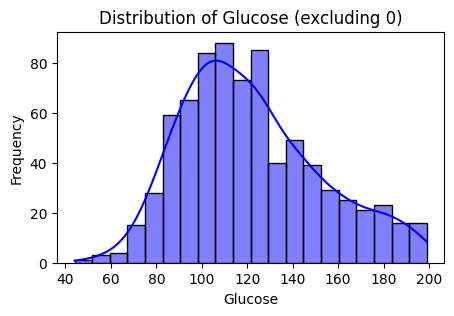

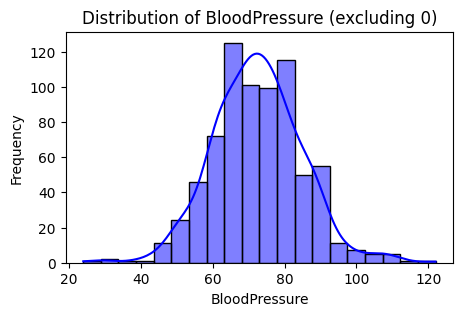

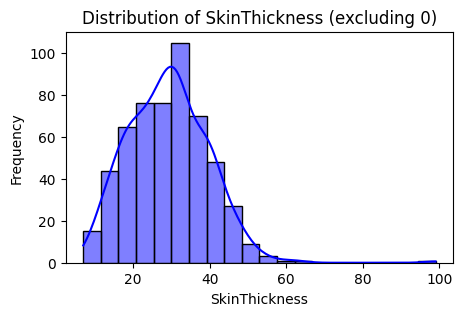

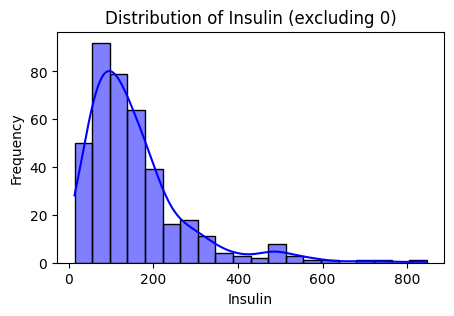

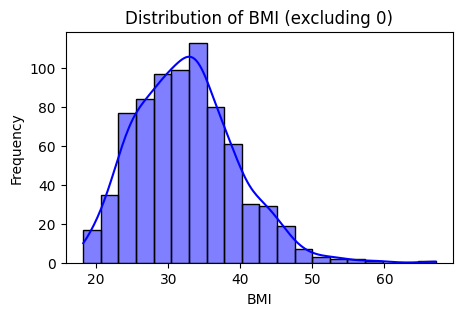

In [11]:
for i in non_zero_columns:

        filtered_data = df[df[i] != 0]

        plt.figure(figsize=(5, 3))
        sns.histplot(filtered_data[i], bins=20, kde=True, color='blue')

        # Set plot labels and title
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {i} (excluding 0)')

        # Show the plot
        plt.show()

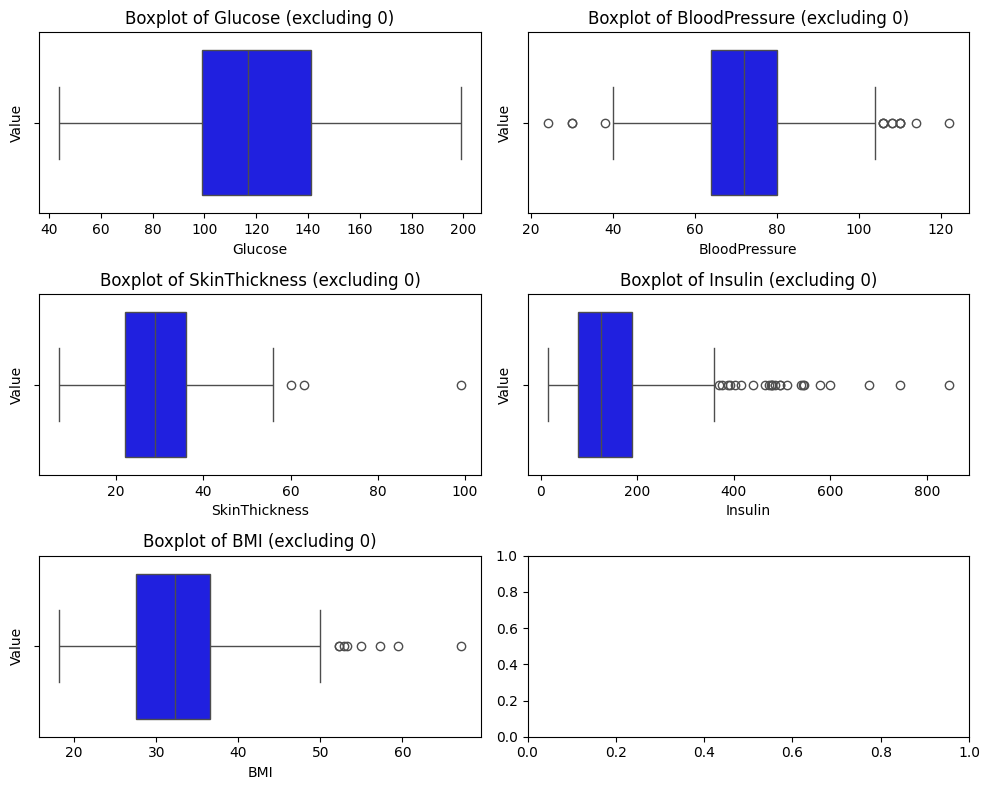

In [12]:
n_cols = 2
n_rows = -(-len(non_zero_columns) // n_cols) 

# Create a figure with subplots and flatten the axes array to iterate over the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))
axes = axes.flatten()


for i, col in enumerate(non_zero_columns):
    filtered_data = df[df[col] != 0]
    sns.boxplot(x=filtered_data[col], color='blue', ax=axes[i])

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Boxplot of {col} (excluding 0)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [13]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 4. [EDA (Exploratory Data Analysis)](#4-eda)

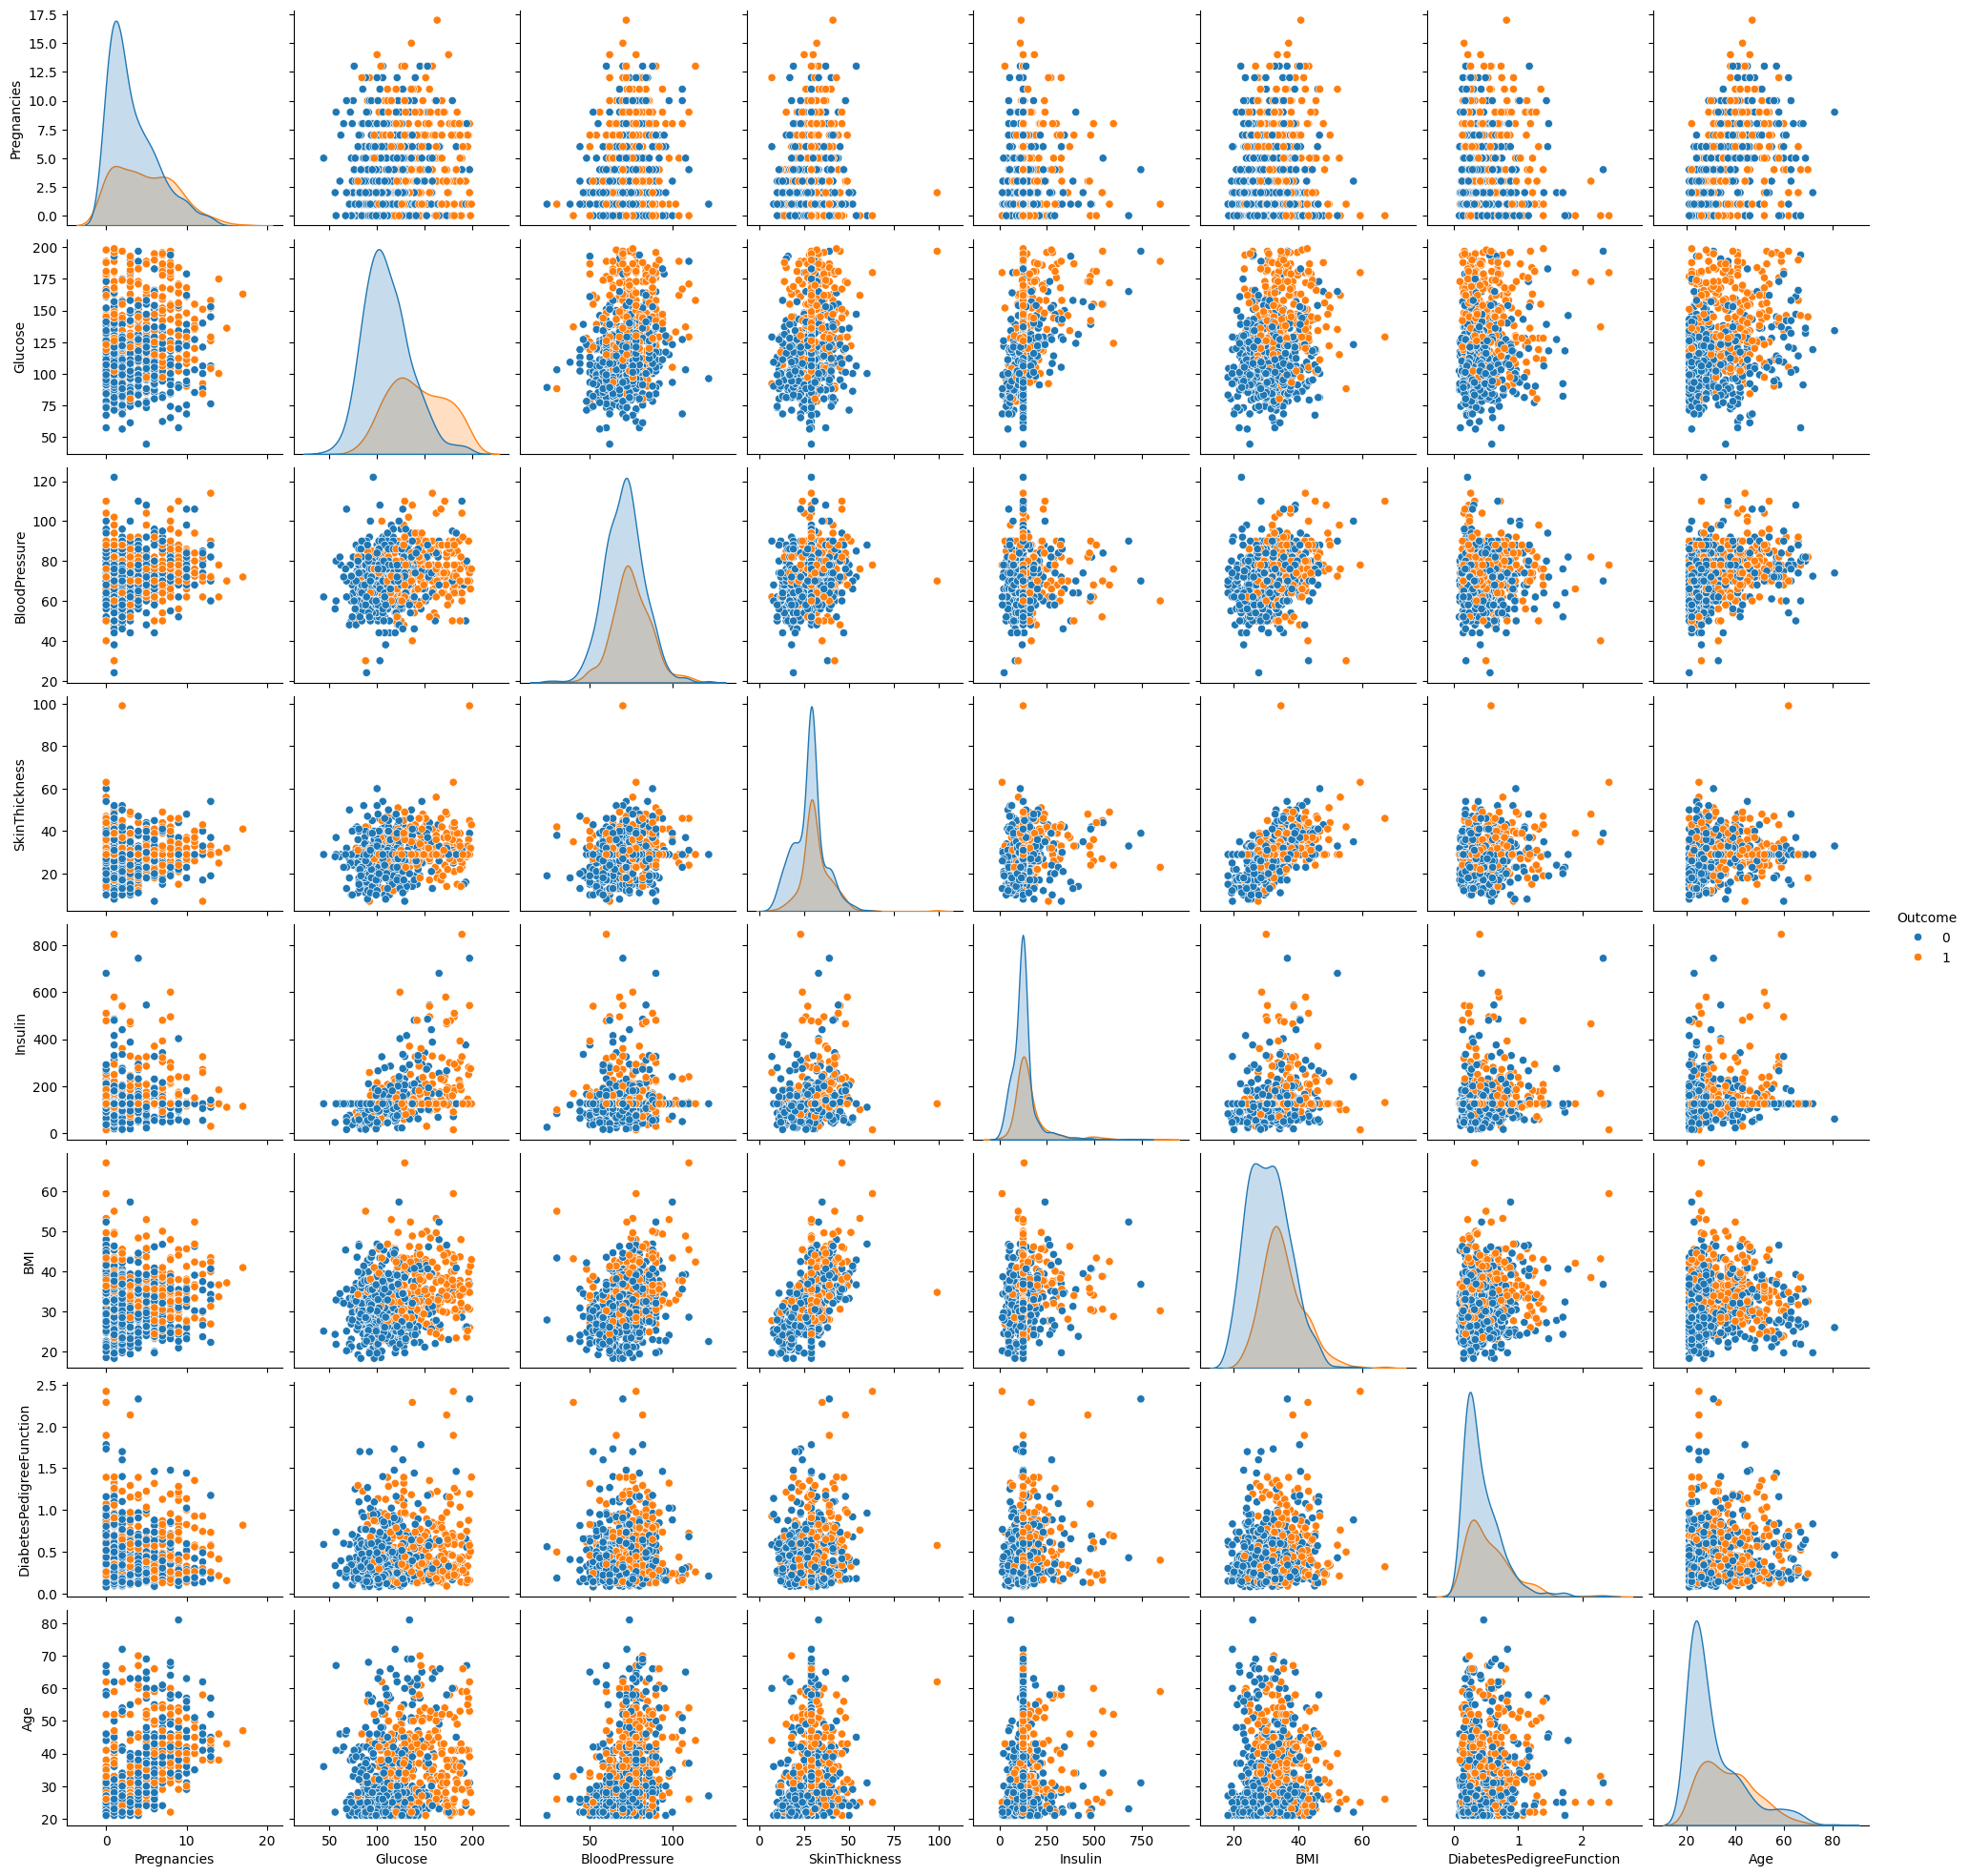

In [15]:
sns.pairplot(df, hue='Outcome') 
plt.show()

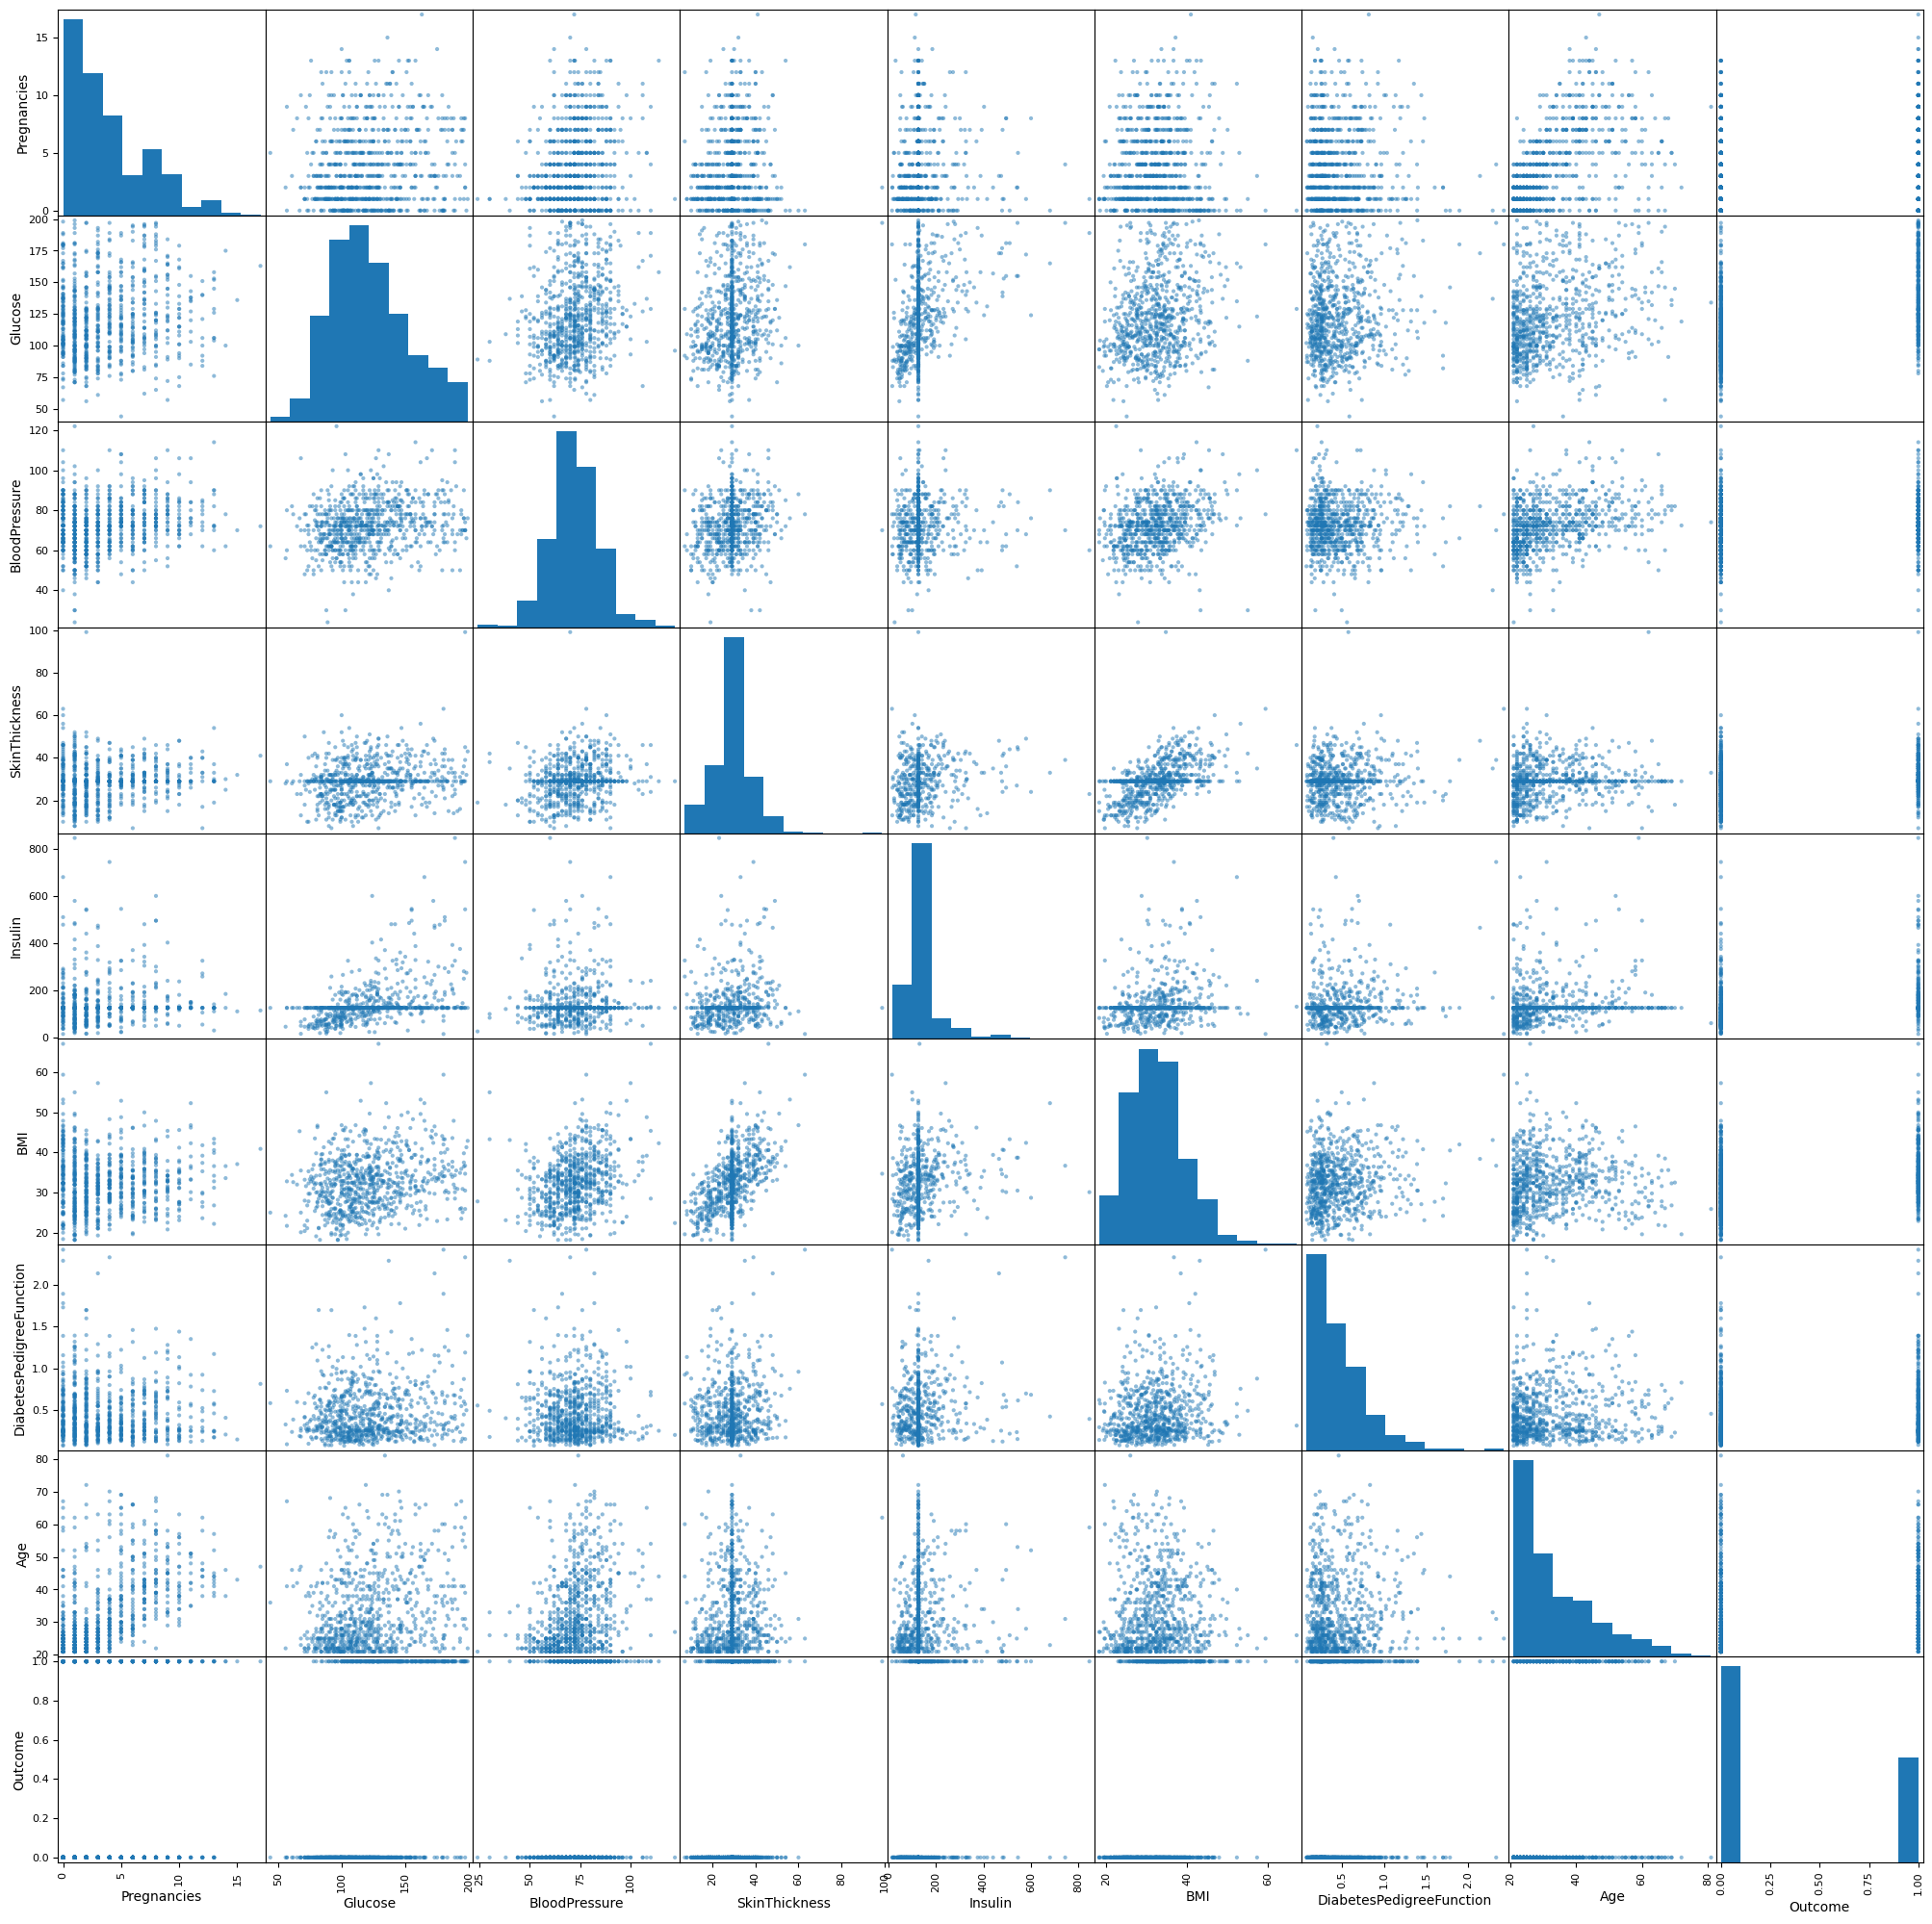

In [17]:
p=scatter_matrix(df,figsize=(25, 25))

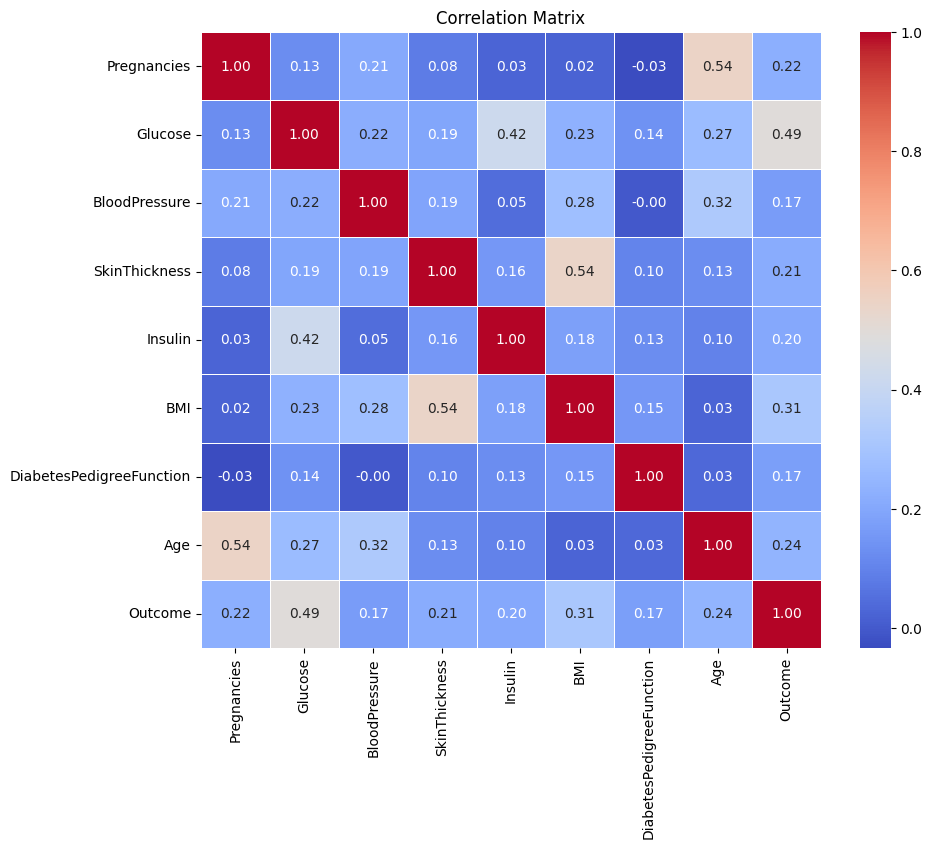

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

In [ ]:
cor_target = abs(correlation_matrix["Outcome"])

relevant_features = cor_target
relevant_features.sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

## 6. [Scaling](#6-scaling)

Scaling data is important for K-Nearest Neighbors (KNN) because KNN relies on distances between data points to make predictions. The algorithm calculates distances, such as Euclidean distance, between data points to determine their similarity. If features have different scales, features with larger magnitudes can dominate the distance calculation, leading to biased results.

In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                                           'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
X_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

## 7. [Tune Hyperparameters - Grid Search](#7-tune-hyperparameters---grid-search)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [30]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [31]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.47916666666666 % and k = [12]


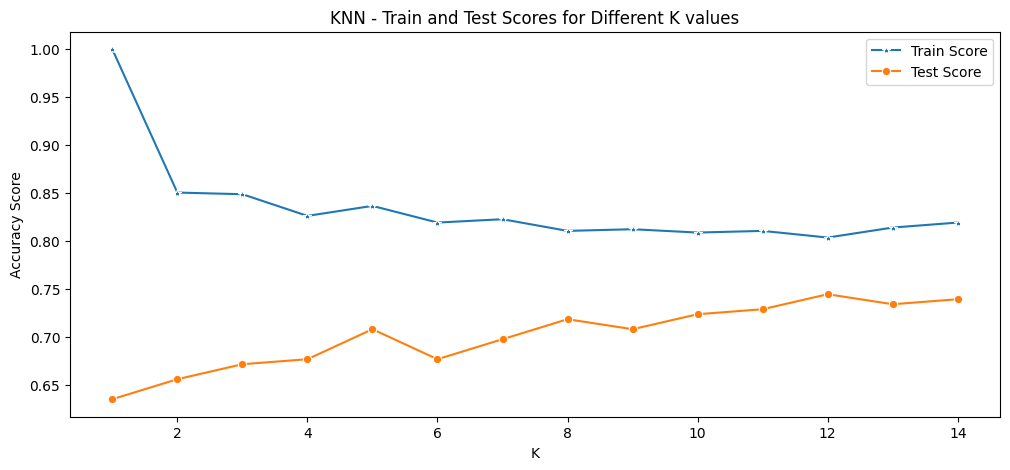

In [39]:
# Plotting the results
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('KNN - Train and Test Scores for Different K values')
plt.show()


In [42]:
# Find the value of k where the difference between train score and test score is the smallest
diff_scores = np.abs(np.array(train_scores) - np.array(test_scores))
best_k = np.argmin(diff_scores) + 1  # Adding 1 because k starts from 1
min_diff = diff_scores[best_k - 1]

print(f"Optimal k: {best_k}, Minimum Difference: {min_diff:.4f}")


Optimal k: 12, Minimum Difference: 0.0590


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [72]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [12],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

Best Parameters: {'n_neighbors': 12, 'p': 2, 'weights': 'distance'}
Accuracy on Test Set: 0.72


## 8. [Build Model](#8-build-model)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [85]:
best_params = {'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

model = KNeighborsClassifier(**best_params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Although we should set wegihts in parametes to 'distance' i have tried setting 'uniform and suprisingly got a 1% better score

## 9. [Evaluate Model](#9-evaluate-model)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.7396
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.67      0.54      0.60        69

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



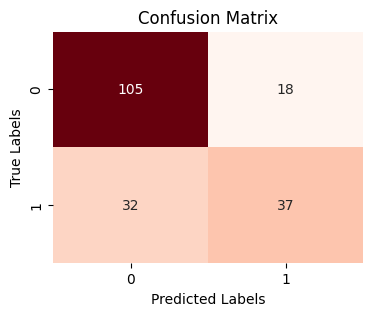

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()